In [32]:
# The import statements
import math
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [33]:
# Constants for configuration
DB_PATH = './simulation-series/high-mod-series.db'
DB_PATH_ADV_SERIES = './simulation-series/advanced-series.db'
DB_PATH_ADV_MEM_SERIES = './simulation-series/advanced-series-mem.db'
TABLE_SUMMARIES = 'SUMMARIES'
TABLE_AVERAGED_RESULTS = 'AVERAGED_RESULTS'

In [34]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Query to retrieve the data from the database
query = f"SELECT * FROM {TABLE_SUMMARIES}"

# Read the data into a pandas DataFrame
dataframe = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
dataframe.head()

,timestamp,algorithm,assortativity,averageAuthorityScore,averageBetweennessCentrality,averageClosenessCentrality,averageCommunitySize,averageDegreeCentrality,averageEccentricity,averageEigenvectorCentrality,...,stdevNeighborsDegree,stdevNodeDegree,stdevPageRank,stdevRichClubCoefficient,transitivity,triangleProbability,graphType,objectStoragePath,numRounds,factor
0,2023-08-09-14-22-24,community_probabilities,-0.1272,0.001,0.0062,0.1449,31.2500,0.002,14.309,0.0093,...,10.7370,288.8194,0.0013,0.2997,0.0000,0.2208,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,19.0,NaN
1,2023-08-09-14-16-01,community_probabilities,-0.1104,0.001,0.0061,0.1460,27.7778,0.002,11.752,0.0095,...,8.4989,288.8194,0.0012,0.2452,0.0006,0.2208,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,20.0,NaN
2,2023-08-09-14-40-37,community_probabilities,-0.0967,0.001,0.0053,0.1659,32.2581,0.002,12.103,0.0099,...,15.1625,288.8194,0.0015,0.3345,0.0057,0.8012,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,34.0,NaN
3,2023-08-09-14-31-55,community_probabilities,-0.1296,0.001,0.0060,0.1489,30.3030,0.002,12.477,0.0096,...,12.5728,288.8194,0.0014,0.4092,0.0060,0.8012,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,38.0,NaN
4,2023-08-09-14-57-51,community_probabilities,-0.1300,0.001,0.0056,0.1564,27.7778,0.002,11.626,0.0116,...,11.8887,288.8194,0.0014,0.2470,0.0023,0.3861,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,21.0,NaN


In [35]:
# Establish a connection to the additional SQLite database
conn_adv = sqlite3.connect(DB_PATH_ADV_SERIES)

# Query to retrieve the data from the additional database
query_adv = f"SELECT * FROM {TABLE_SUMMARIES}"

# Read the data from the additional database into a pandas DataFrame
dataframe_adv = pd.read_sql_query(query_adv, conn_adv)

# Close the additional database connection
conn_adv.close()

# Concatenate or merge the dataframes vertically
dataframe = pd.concat([dataframe, dataframe_adv], ignore_index=True)

# Display the first few rows of the combined DataFrame
dataframe.head()

,timestamp,algorithm,assortativity,averageAuthorityScore,averageBetweennessCentrality,averageClosenessCentrality,averageCommunitySize,averageDegreeCentrality,averageEccentricity,averageEigenvectorCentrality,...,stdevNodeDegree,stdevPageRank,stdevRichClubCoefficient,transitivity,triangleProbability,graphType,objectStoragePath,numRounds,factor,weighting_param_a
0,2023-08-09-14-22-24,community_probabilities,-0.1272,0.001,0.0062,0.1449,31.2500,0.002,14.309,0.0093,...,288.8194,0.0013,0.2997,0.0000,0.2208,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,19.0,NaN,NaN
1,2023-08-09-14-16-01,community_probabilities,-0.1104,0.001,0.0061,0.1460,27.7778,0.002,11.752,0.0095,...,288.8194,0.0012,0.2452,0.0006,0.2208,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,20.0,NaN,NaN
2,2023-08-09-14-40-37,community_probabilities,-0.0967,0.001,0.0053,0.1659,32.2581,0.002,12.103,0.0099,...,288.8194,0.0015,0.3345,0.0057,0.8012,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,34.0,NaN,NaN
3,2023-08-09-14-31-55,community_probabilities,-0.1296,0.001,0.0060,0.1489,30.3030,0.002,12.477,0.0096,...,288.8194,0.0014,0.4092,0.0060,0.8012,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,38.0,NaN,NaN
4,2023-08-09-14-57-51,community_probabilities,-0.1300,0.001,0.0056,0.1564,27.7778,0.002,11.626,0.0116,...,288.8194,0.0014,0.2470,0.0023,0.3861,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,21.0,NaN,NaN


In [36]:
# Establish a connection to the additional SQLite database
conn_adv = sqlite3.connect(DB_PATH_ADV_MEM_SERIES)

# Query to retrieve the data from the additional database
query_adv = f"SELECT * FROM {TABLE_SUMMARIES}"

# Read the data from the additional database into a pandas DataFrame
dataframe_adv = pd.read_sql_query(query_adv, conn_adv)

# Close the additional database connection
conn_adv.close()

# Concatenate or merge the dataframes vertically
dataframe = pd.concat([dataframe, dataframe_adv], ignore_index=True)

# Display the first few rows of the combined DataFrame
dataframe.head()

,timestamp,algorithm,assortativity,averageAuthorityScore,averageBetweennessCentrality,averageClosenessCentrality,averageCommunitySize,averageDegreeCentrality,averageEccentricity,averageEigenvectorCentrality,...,stdevPageRank,stdevRichClubCoefficient,transitivity,triangleProbability,graphType,objectStoragePath,numRounds,factor,weighting_param_a,prior_partner_factor
0,2023-08-09-14-22-24,community_probabilities,-0.1272,0.001,0.0062,0.1449,31.2500,0.002,14.309,0.0093,...,0.0013,0.2997,0.0000,0.2208,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,19.0,NaN,NaN,NaN
1,2023-08-09-14-16-01,community_probabilities,-0.1104,0.001,0.0061,0.1460,27.7778,0.002,11.752,0.0095,...,0.0012,0.2452,0.0006,0.2208,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,20.0,NaN,NaN,NaN
2,2023-08-09-14-40-37,community_probabilities,-0.0967,0.001,0.0053,0.1659,32.2581,0.002,12.103,0.0099,...,0.0015,0.3345,0.0057,0.8012,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,34.0,NaN,NaN,NaN
3,2023-08-09-14-31-55,community_probabilities,-0.1296,0.001,0.0060,0.1489,30.3030,0.002,12.477,0.0096,...,0.0014,0.4092,0.0060,0.8012,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,38.0,NaN,NaN,NaN
4,2023-08-09-14-57-51,community_probabilities,-0.1300,0.001,0.0056,0.1564,27.7778,0.002,11.626,0.0116,...,0.0014,0.2470,0.0023,0.3861,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,21.0,NaN,NaN,NaN


In [37]:
# Group the DataFrame by 'algorithm' and 'factor'
group_by_alg = dataframe.groupby('algorithm')

# Create a dictionary to store the smaller DataFrames
alg_df = {}

# Iterate over the groups and store them in the dictionary
for algorithm, group_df in group_by_alg:
    alg_df[algorithm] = group_df

alg_df.keys()

dict_keys(['betweenness_community_probabilities', 'betweenness_weighted', 'betweenness_weighted_complex_memory', 'community_probabilities', 'default', 'eigenvector_community_probabilities', 'eigenvector_weighted', 'eigenvector_weighted_complex_memory', 'hub_score_community_probabilities', 'hub_score_weighted', 'weighted_factor'])

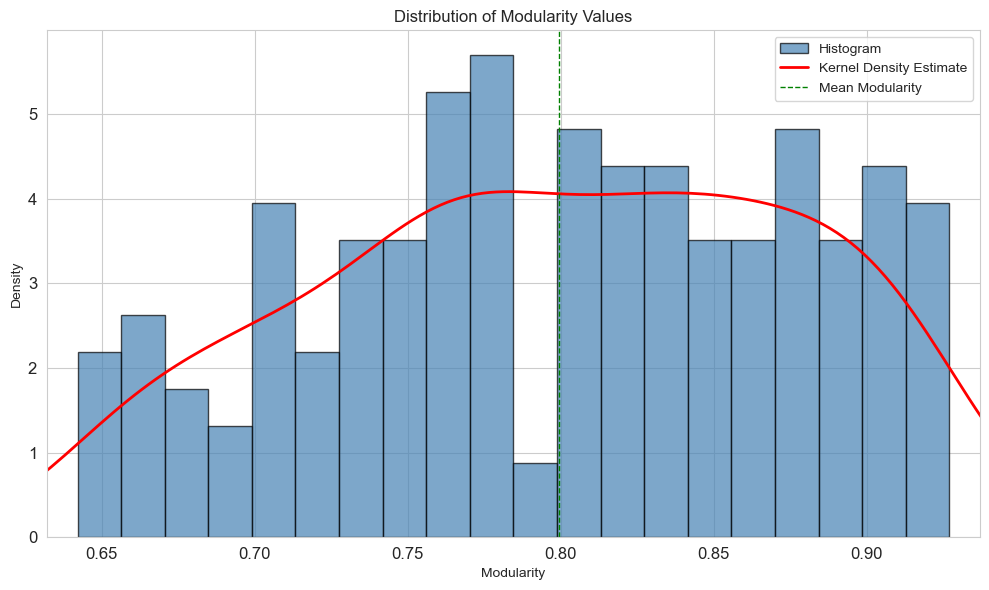

In [38]:
# Extract the modularity values for the 'default' algorithm
modularity_values_default = alg_df['default']['modularity']

# Set the style using Seaborn
sns.set_style('whitegrid')

# Create a histogram plot
plt.figure(figsize=(10, 6))

# Customize the histogram appearance
plt.hist(modularity_values_default, bins=20, color='steelblue', alpha=0.7, edgecolor='black', density=True, label='Histogram')

# Overlay a kernel density estimate (curve)
sns.kdeplot(modularity_values_default, color='red', linewidth=2, label='Kernel Density Estimate')

plt.xlabel('Modularity')
plt.ylabel('Density')
plt.title('Distribution of Modularity Values')

# Calculate and display the mean
mean_modularity = modularity_values_default.mean()
plt.axvline(x=mean_modularity, color='green', linestyle='dashed', linewidth=1, label='Mean Modularity')

# Set x-axis limits to avoid extending beyond the data
plt.xlim(modularity_values_default.min()-0.01, modularity_values_default.max()+0.01)

# Add legend
plt.legend()

# Customize tick labels and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

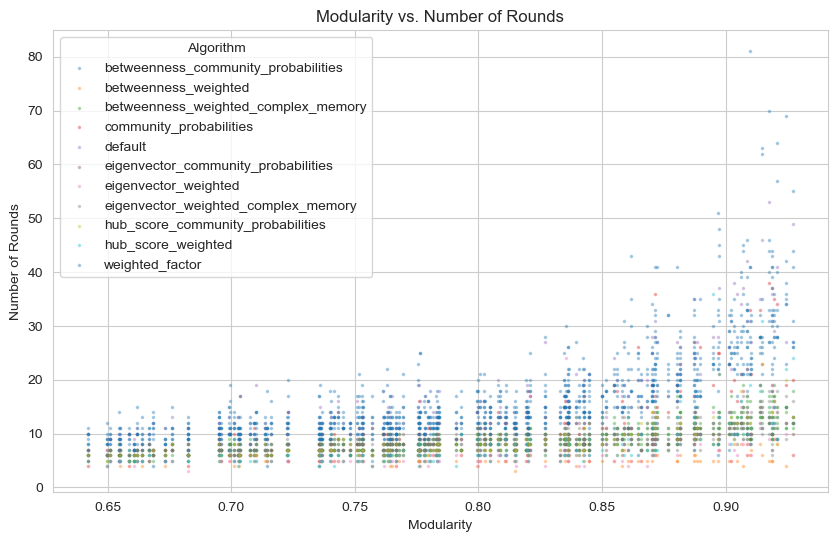

In [39]:
# Create a pretty plot using matplotlib
plt.figure(figsize=(10, 6))

for alg, df in alg_df.items():
    plt.scatter(df['modularity'], df['numRounds'], label=alg, alpha=0.3, marker='.', s=10)

plt.xlabel('Modularity')
plt.ylabel('Number of Rounds')
plt.title('Modularity vs. Number of Rounds')
plt.legend(title='Algorithm')

# Show the plot
plt.show()

In [40]:
# Group the DataFrame by 'factor'
group_by_factor = dataframe[dataframe['algorithm']=='weighted_factor'].groupby('factor')

# Create dictionaries to store the smaller DataFrames
grouped_df = {}
grouped_df_adv = {}  # New dictionary for advanced algorithms

# Iterate over the groups and store them in the dictionaries
for factor, group_df in group_by_factor:
    factor_key = f'{factor}'
    grouped_df[factor_key] = group_df
    print(f'Dataframe for weighted with factor {factor_key} has {len(group_df)} entries')

# Filter and store data for community_probabilities algorithm
df_community_probabilities = dataframe[dataframe['algorithm'] == 'community_probabilities']
print(f'Dataframe for community_probabilities has {len(df_community_probabilities)} entries')

# Filter and store data for default algorithm
df_default = dataframe[dataframe['algorithm'] == 'default']
print(f'Dataframe for default has {len(df_default)} entries')

# Filter and store data for advanced algorithms (excluding default and weightedFactor)
advanced_algorithms = dataframe[
    (dataframe['algorithm'] != 'default') &
    (dataframe['algorithm'] != 'weighted_factor')&
    (dataframe['algorithm'] != 'community_probabilities')
]

# Group the advanced algorithm data by algorithm name
group_by_algorithm_adv = advanced_algorithms.groupby('algorithm')

for algorithm, algorithm_df in group_by_algorithm_adv:
    algorithm_key = f'{algorithm}'
    grouped_df_adv[algorithm_key] = algorithm_df
    print(f'Dataframe for {algorithm_key} has {len(algorithm_df)} entries')

# Display keys in both dictionaries
print("Keys in grouped_df:", list(grouped_df.keys()))
print("Keys in grouped_df_adv:", list(grouped_df_adv.keys()))

Dataframe for weighted with factor 1.25 has 160 entries
Dataframe for weighted with factor 1.5 has 160 entries
Dataframe for weighted with factor 1.75 has 160 entries
Dataframe for weighted with factor 2.0 has 160 entries
Dataframe for weighted with factor 2.25 has 160 entries
Dataframe for weighted with factor 2.5 has 160 entries
Dataframe for weighted with factor 2.75 has 160 entries
Dataframe for weighted with factor 3.0 has 160 entries
Dataframe for community_probabilities has 160 entries
Dataframe for default has 160 entries
Dataframe for betweenness_community_probabilities has 160 entries
Dataframe for betweenness_weighted has 160 entries
Dataframe for betweenness_weighted_complex_memory has 800 entries
Dataframe for eigenvector_community_probabilities has 160 entries
Dataframe for eigenvector_weighted has 160 entries
Dataframe for eigenvector_weighted_complex_memory has 800 entries
Dataframe for hub_score_community_probabilities has 160 entries
Dataframe for hub_score_weighted h

In [41]:
df_bn = dataframe[dataframe['algorithm'] == 'betweenness_weighted']
df_ev = dataframe[dataframe['algorithm'] == 'eigenvector_weighted']

In [42]:
def group_by_ppf(dataframe, prefix):
    group_by_ppf = dataframe.groupby('prior_partner_factor')

    grouped_df = {}

    # Iterate over the groups and store them in the dictionary
    for factor, group_df in group_by_ppf:
        factor_key = f'{prefix}_{factor}'
        grouped_df[factor_key] = group_df
        print(f'Dataframe has {len(group_df)} entries for ppf {factor_key}')

    return grouped_df

In [43]:
df_betweenness_weighted_complex_memory = dataframe[dataframe['algorithm'] == 'betweenness_weighted_complex_memory']
print(f'Dataframe cp_mem has {len(df_betweenness_weighted_complex_memory)} entries')

grouped_df_bn_cmem = group_by_ppf(df_betweenness_weighted_complex_memory, 'bn_cmem')

df_eigenvector_weighted_complex_memory = dataframe[dataframe['algorithm'] == 'eigenvector_weighted_complex_memory']
print(f'Dataframe cp_cmem has {len(df_eigenvector_weighted_complex_memory)} entries')

grouped_df_ev_cmem = group_by_ppf(df_eigenvector_weighted_complex_memory, 'ev_cmem')

Dataframe cp_mem has 800 entries
Dataframe has 160 entries for ppf bn_cmem_0.1
Dataframe has 160 entries for ppf bn_cmem_0.2
Dataframe has 160 entries for ppf bn_cmem_0.3
Dataframe has 160 entries for ppf bn_cmem_0.4
Dataframe has 160 entries for ppf bn_cmem_0.5
Dataframe cp_cmem has 800 entries
Dataframe has 160 entries for ppf ev_cmem_0.1
Dataframe has 160 entries for ppf ev_cmem_0.2
Dataframe has 160 entries for ppf ev_cmem_0.3
Dataframe has 160 entries for ppf ev_cmem_0.4
Dataframe has 160 entries for ppf ev_cmem_0.5


In [44]:
grouped_df = grouped_df_bn_cmem.copy()
grouped_df.update(grouped_df_ev_cmem)
grouped_df.keys()

dict_keys(['bn_cmem_0.1', 'bn_cmem_0.2', 'bn_cmem_0.3', 'bn_cmem_0.4', 'bn_cmem_0.5', 'ev_cmem_0.1', 'ev_cmem_0.2', 'ev_cmem_0.3', 'ev_cmem_0.4', 'ev_cmem_0.5'])

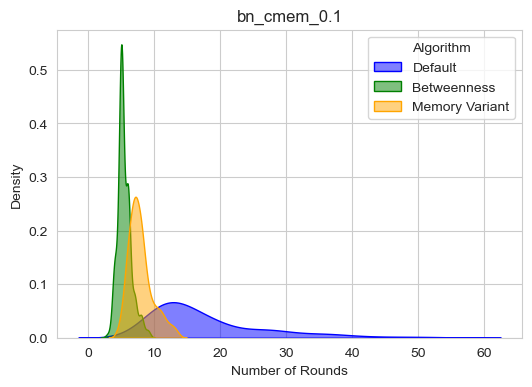

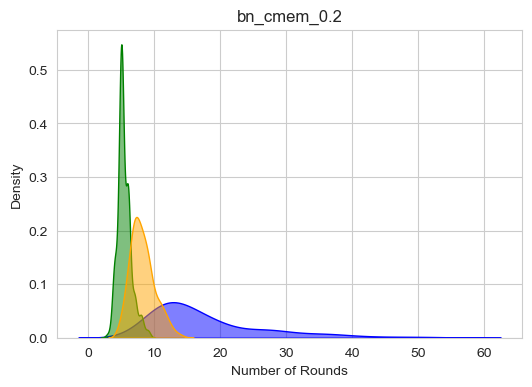

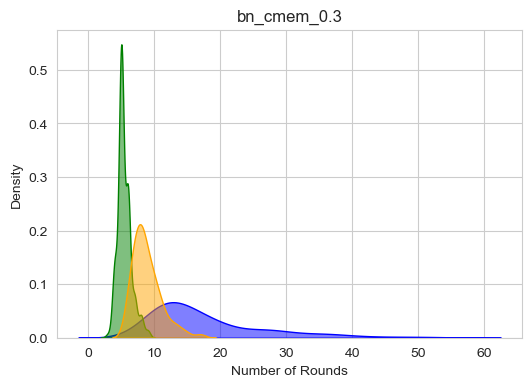

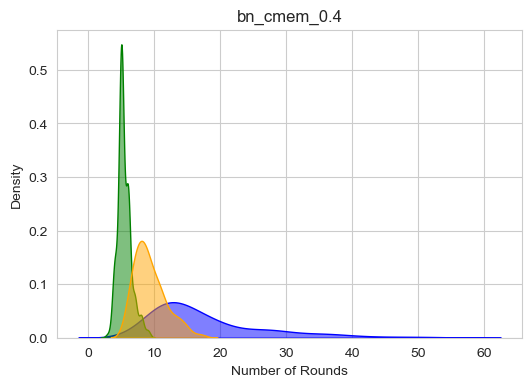

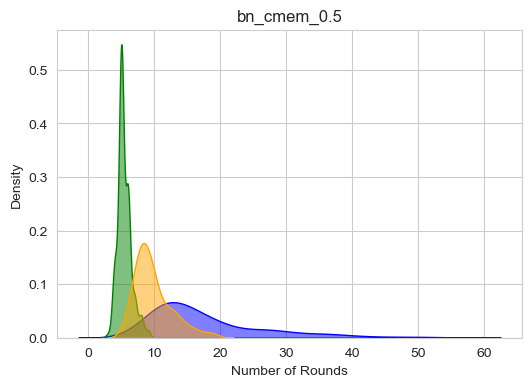

In [45]:
# Sort the grouped DataFrame keys
sorted_keys = sorted(grouped_df_bn_cmem.keys())

# Iterate over the sorted grouped keys and create separate plots
for idx, group_key in enumerate(sorted_keys):
    # Get the DataFrame for the current key
    group_df = grouped_df[group_key]

    # Create a new plot for each rounded modularity combination
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df_default, x='numRounds', label='Default', color='blue', fill=True, alpha=0.5)
    sns.kdeplot(data=df_bn, x='numRounds', label='Betweenness', color='green', fill=True, alpha=0.5)
    sns.kdeplot(data=group_df, x='numRounds', label='Memory Variant', color='orange', fill=True, alpha=0.5)

    plt.xlabel('Number of Rounds')
    plt.ylabel('Density')
    plt.title(f'{group_key}')
    if idx == 0:
        plt.legend(title='Algorithm')

    # Show the plot
    plt.show()


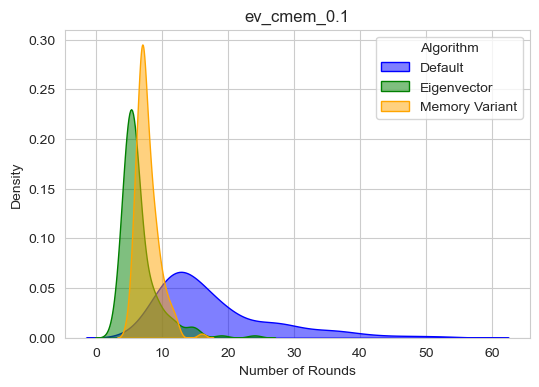

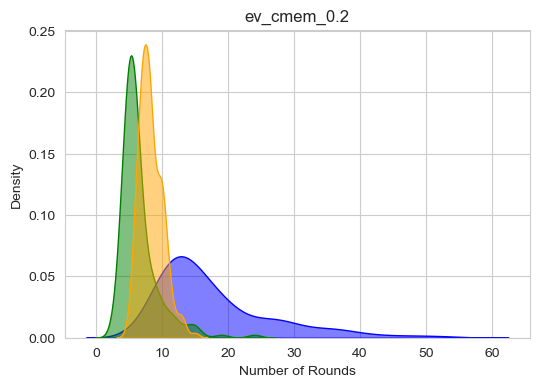

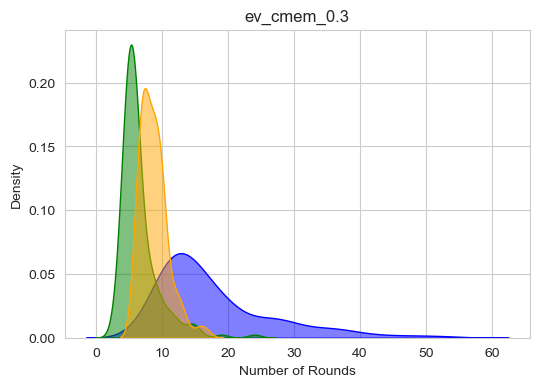

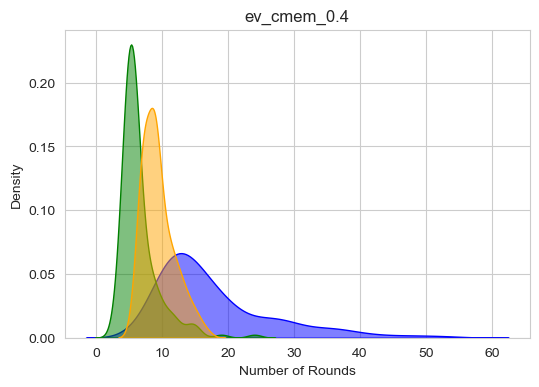

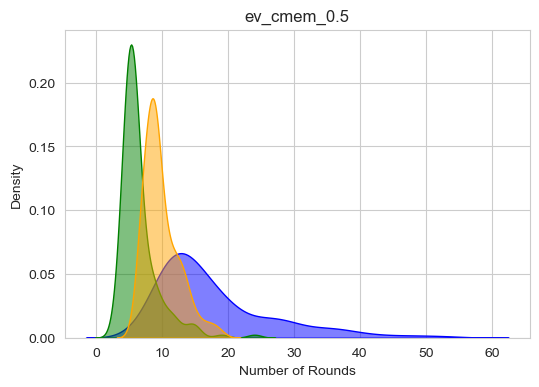

In [46]:
# Sort the grouped DataFrame keys
sorted_keys = sorted(grouped_df_ev_cmem.keys())

# Iterate over the sorted grouped keys and create separate plots
for idx, group_key in enumerate(sorted_keys):
    # Get the DataFrame for the current key
    group_df = grouped_df[group_key]

    # Create a new plot for each rounded modularity combination
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df_default, x='numRounds', label='Default', color='blue', fill=True, alpha=0.5)
    sns.kdeplot(data=df_ev, x='numRounds', label='Eigenvector', color='green', fill=True, alpha=0.5)
    sns.kdeplot(data=group_df, x='numRounds', label='Memory Variant', color='orange', fill=True, alpha=0.5)

    plt.xlabel('Number of Rounds')
    plt.ylabel('Density')
    plt.title(f'{group_key}')
    if idx == 0:
        plt.legend(title='Algorithm')

    # Show the plot
    plt.show()


In [47]:
df_default_mean = df_default['numRounds'].mean()
df_default_mean

17.81875

In [48]:
weighted_factor_mean = dataframe[dataframe['algorithm'] == 'weighted_factor'].groupby('factor')['numRounds'].mean()
weighted_factor_mean

factor
1.25    16.88750
1.50    17.16250
1.75    16.91875
2.00    16.80000
2.25    16.46875
2.50    16.13750
2.75    15.79375
3.00    16.27500
Name: numRounds, dtype: float64

In [49]:
df_community_probabilities_mean = df_community_probabilities['numRounds'].mean()
df_community_probabilities_mean

13.59375

In [50]:
# Dictionary to store the computed means
adv_algorithm_means = {}

# Iterate over the advanced algorithm keys and DataFrames
for algorithm_key, algorithm_df in grouped_df.items():
    # Calculate the mean of 'numRounds' for the current algorithm
    mean_num_rounds = algorithm_df['numRounds'].mean()

    # Store the mean in the dictionary
    adv_algorithm_means[algorithm_key] = mean_num_rounds

# Create a DataFrame from the dictionary
df_adv_algorithm_means = pd.DataFrame.from_dict(adv_algorithm_means, orient='index', columns=['numRounds'])
df_adv_algorithm_means.index.name = 'algorithm'

df_adv_algorithm_means

,numRounds
algorithm,
bn_cmem_0.1,7.83125
bn_cmem_0.2,8.16250
bn_cmem_0.3,8.83750
bn_cmem_0.4,9.30000
bn_cmem_0.5,9.75625
ev_cmem_0.1,7.71875
ev_cmem_0.2,8.26250
ev_cmem_0.3,8.71875
ev_cmem_0.4,9.37500


In [51]:
algorithm_means_ev = {}
algorithm_means_bn = {}

# Add the mean values from df_adv_algorithm_means
for algorithm_key, mean_value in adv_algorithm_means.items():
    # Remove '_weighted' from algorithm names (used factor 1.0)
    if algorithm_key.endswith('_weighted'):
        new_algorithm_key = algorithm_key.replace('_weighted', '')
    # Use shorter name for better visualization
    elif algorithm_key.endswith('_community_probabilities'):
        new_algorithm_key = algorithm_key.replace('_community_probabilities', '_comm_prob')
    else:
        new_algorithm_key = algorithm_key
    if 'bn' in new_algorithm_key:
        algorithm_means_bn[new_algorithm_key] = mean_value
    else:
        algorithm_means_ev[new_algorithm_key] = mean_value

algorithm_means_bn

{'bn_cmem_0.1': 7.83125,
 'bn_cmem_0.2': 8.1625,
 'bn_cmem_0.3': 8.8375,
 'bn_cmem_0.4': 9.3,
 'bn_cmem_0.5': 9.75625}

In [52]:
algorithm_means_ev

{'ev_cmem_0.1': 7.71875,
 'ev_cmem_0.2': 8.2625,
 'ev_cmem_0.3': 8.71875,
 'ev_cmem_0.4': 9.375,
 'ev_cmem_0.5': 9.83125}

In [53]:
# Create a DataFrame from the dictionary
df_algorithm_means_ev = pd.DataFrame.from_dict(algorithm_means_ev, orient='index', columns=['numRounds'])
df_algorithm_means_ev.index.name = 'algorithm'

df_algorithm_means_ev

,numRounds
algorithm,
ev_cmem_0.1,7.71875
ev_cmem_0.2,8.26250
ev_cmem_0.3,8.71875
ev_cmem_0.4,9.37500
ev_cmem_0.5,9.83125


In [54]:
# Create a DataFrame from the dictionary
df_algorithm_means_bn = pd.DataFrame.from_dict(algorithm_means_bn, orient='index', columns=['numRounds'])
df_algorithm_means_bn.index.name = 'algorithm'

df_algorithm_means_bn

,numRounds
algorithm,
bn_cmem_0.1,7.83125
bn_cmem_0.2,8.16250
bn_cmem_0.3,8.83750
bn_cmem_0.4,9.30000
bn_cmem_0.5,9.75625


In [55]:
default_series = pd.Series(df_default_mean, index=['default'])
default_series.index.name = 'algorithm'
default_data = default_series.to_frame(name='numRounds')
default_data

,numRounds
algorithm,
default,17.81875


In [56]:
df_ev_mean = df_ev['numRounds'].mean()
ev_series = pd.Series(df_ev_mean, index=['ev'])
ev_series.index.name = 'algorithm'
ev_data = ev_series.to_frame(name='numRounds')
ev_data

,numRounds
algorithm,
ev,6.50625


In [57]:
df_bn_mean = df_bn['numRounds'].mean()
bn_series = pd.Series(df_bn_mean, index=['bn'])
bn_series.index.name = 'algorithm'
bn_data = bn_series.to_frame(name='numRounds')
bn_data

,numRounds
algorithm,
bn,5.4125


In [58]:
algorithm_means_ev = pd.concat([default_data, ev_data, df_algorithm_means_ev])
algorithm_means_ev

,numRounds
algorithm,
default,17.81875
ev,6.50625
ev_cmem_0.1,7.71875
ev_cmem_0.2,8.26250
ev_cmem_0.3,8.71875
ev_cmem_0.4,9.37500
ev_cmem_0.5,9.83125


In [59]:
algorithm_means_bn = pd.concat([default_data, bn_data, df_algorithm_means_bn])
algorithm_means_bn

,numRounds
algorithm,
default,17.81875
bn,5.41250
bn_cmem_0.1,7.83125
bn_cmem_0.2,8.16250
bn_cmem_0.3,8.83750
bn_cmem_0.4,9.30000
bn_cmem_0.5,9.75625


In [60]:
def plot_performance(index, numRounds, title_addition, show_legend):
    plt.figure(figsize=(10, 5))  # Adjusted figure size

    # Adjust the width of the bars here
    bar_width = 0.8  # Decreased width for spacing

    # Create two sets of bars
    bars2 = plt.bar([i for i in range(1, len(index))], [numRounds[0]] * (len(index) - 1), width=bar_width, color='orange')  # Adjusted x positions for the second set of bars
    bars1 = plt.bar(range(1, len(index)), numRounds[1:], width=bar_width, color='blue')  # Leaving out the first value

    # Different colors for first and second bar
    first_bar = bars1[0]
    first_bar.set_facecolor('#89CFF0')

    plt.xlabel('Algorithms')
    plt.ylabel('Number of Rounds')
    plt.title('Performance of different algorithms ' + title_addition)

    # Adding % decrease labels on top of the original bars
    for i, bar in enumerate(bars2):
        percent_change = ((numRounds[i + 1] - numRounds[0]) / numRounds[0]) * 100
        if percent_change > 0:
            plt.text(bars1[i].get_x() + bars1[i].get_width() / 2, bars1[i].get_height() + 0.1, f'+{int(percent_change)}%', ha='center', color='red')
        else:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{int(percent_change)}%', ha='center', color='green')

    # Adjust y-axis tick values and spacing
    max_num_rounds = int(max(numRounds))
    plt.yticks(range(0, max_num_rounds + 2, 2))

    # Create custom legend in the bottom left corner
    if show_legend:
        plt.legend([bars1[0], bars1[2], bars2[0]], ['Without Memory', 'With Memory', 'Default'], loc='lower left')

    # Adjust x-axis ticks and labels
    plt.xticks([i + bar_width / 2 for i in range(1, len(index))], index[1:], rotation=45, ha='right')  # Rotated x labels for better readability

    plt.tight_layout()  # Ensures labels fit within the plot area
    plt.show()

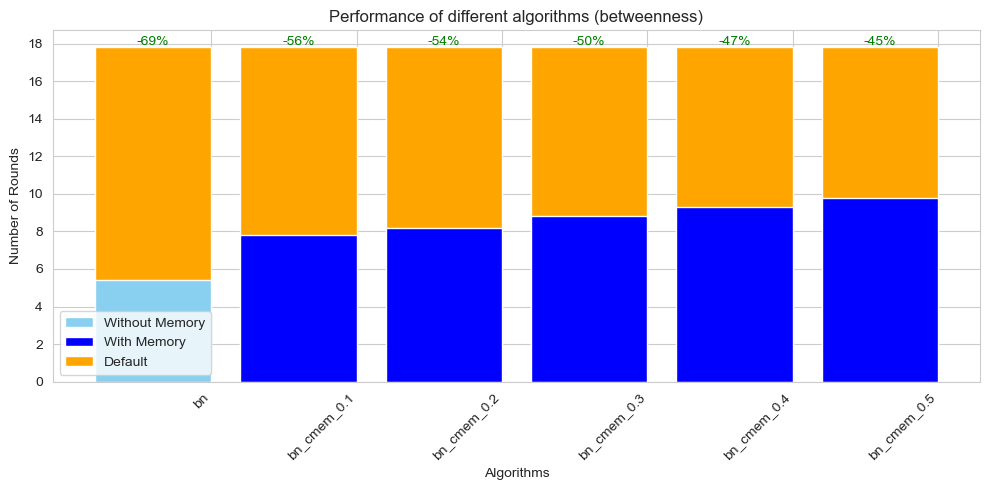

In [61]:
index = algorithm_means_bn.index
numRounds = algorithm_means_bn.numRounds

plot_performance(index, numRounds, '(betweenness)', True)

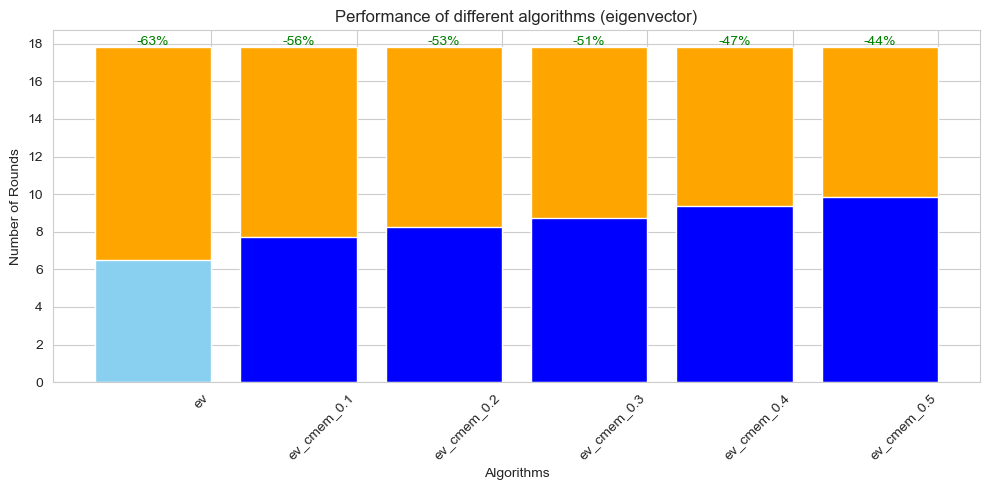

In [63]:
index = algorithm_means_ev.index
numRounds = algorithm_means_ev.numRounds

plot_performance(index, numRounds, '(eigenvector)', False)